# Problem Statement:
    

### Objective:-
Your work is to build a  binary classification model which can identify a pattern in these variables and suggest the target column Y.

#### Classification based on Logistic Regression

### Steps Involved:

1.Importing Data<br>
2.Inspecting Dataframe<br>
3.Data Scaling<br>
4.Train-Test Split<br>
5.Model Building<br>
6.Model Evaluation<br>
7.Making Predictions on Test Dataset<br>
9.Inferences & Conclusions

### Import Packages

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#import warnings filter
from warnings import simplefilter

#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

### Step 1 : Import Train and Test Dataset

In [6]:
#Importing the training data
train=pd.read_csv(r'C:\Users\dhruv\Desktop\DataScience\Arya_DataScientist_Assignment\training_set.csv')
test=pd.read_csv(r'C:\Users\dhruv\Desktop\DataScience\Arya_DataScientist_Assignment\test_set.csv')

### Step 2: Data Inspection

In [7]:
train.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [8]:
#Drop the unamed Column
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [10]:
train.shape

(3910, 58)

In [11]:
#To check if any null values are present in Dataset
train.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [12]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

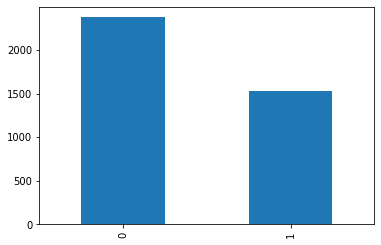

In [13]:
#To check if the train data is imbalanced
train['Y'].value_counts().plot(kind="bar")
plt.show()

In [14]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

## Visualization

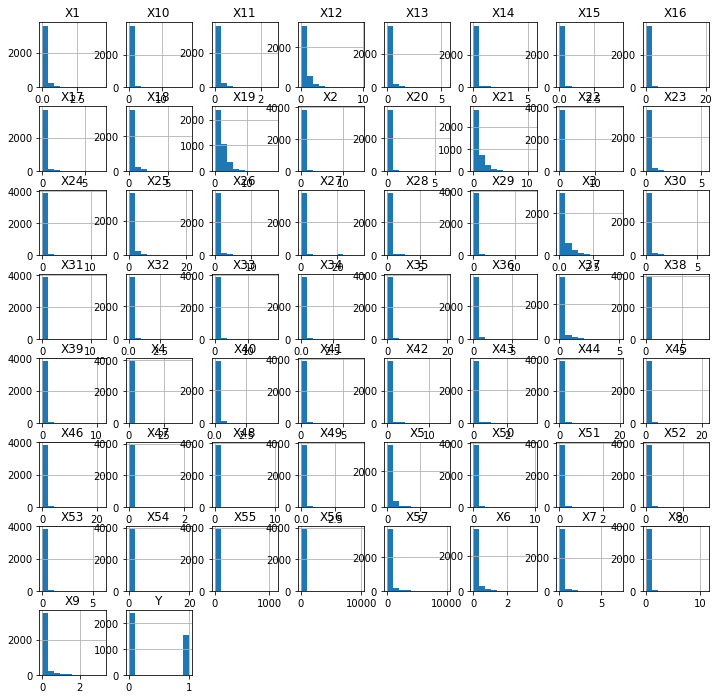

In [15]:
train.hist(figsize=(12,12))
plt.show()

In [17]:
train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

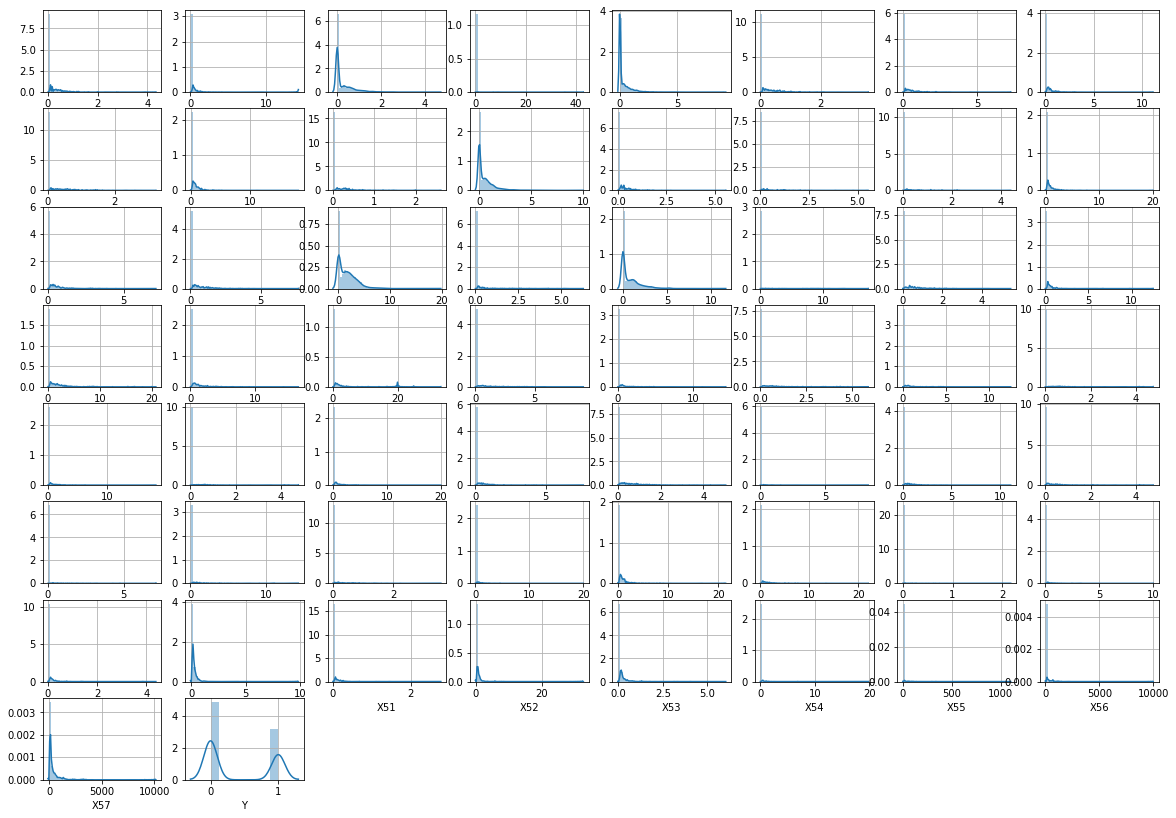

In [18]:
plt.figure(figsize=(20,25))
for i, column in enumerate(list(train.columns)):
    plt.subplot(14,8, i+1)
    sns.distplot(train[column])
    plt.grid()

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

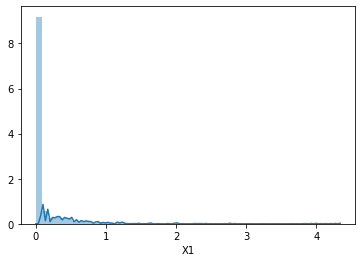

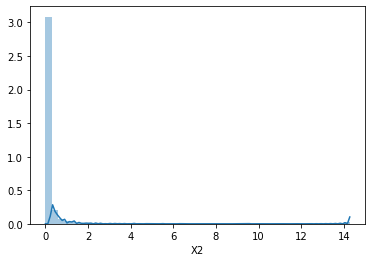

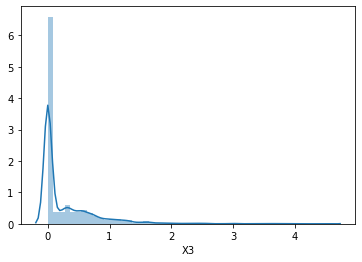

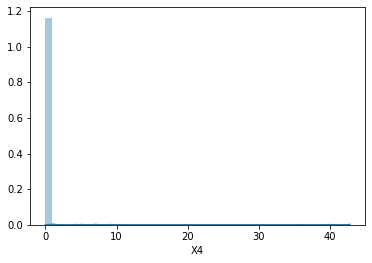

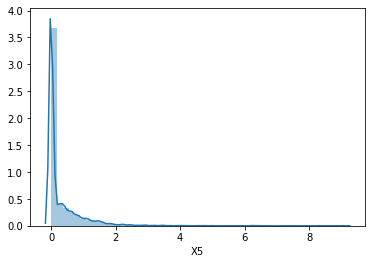

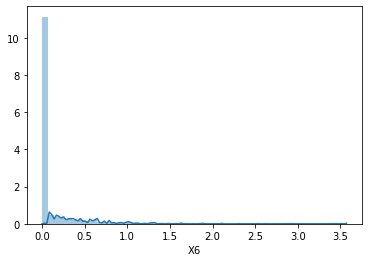

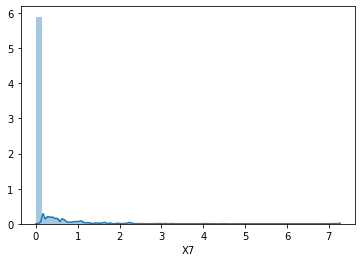

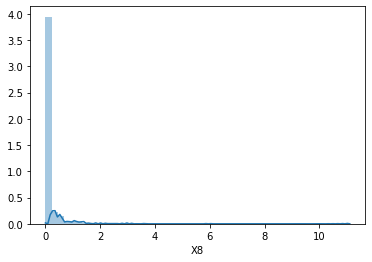

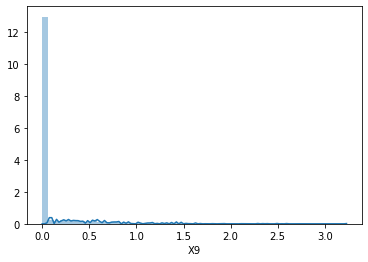

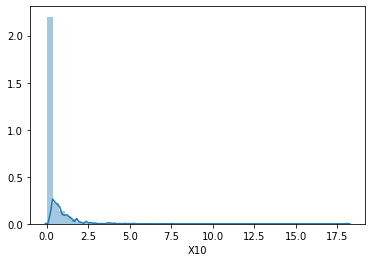

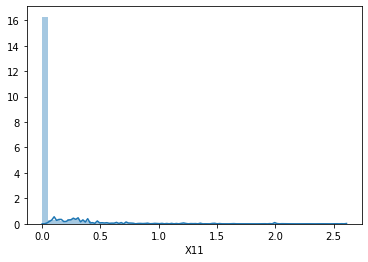

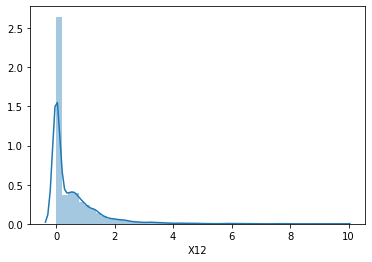

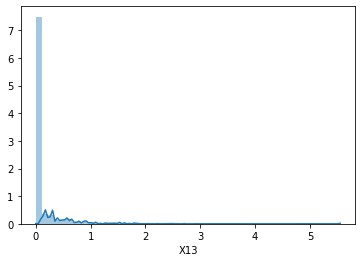

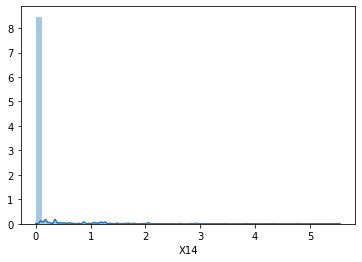

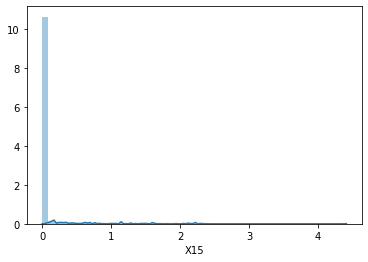

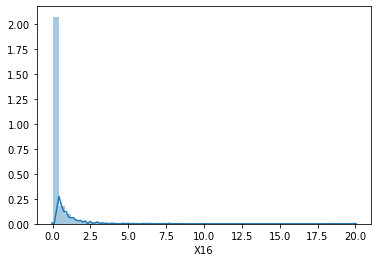

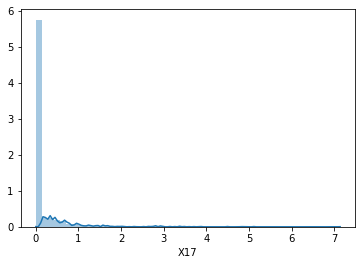

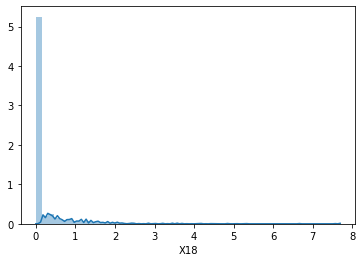

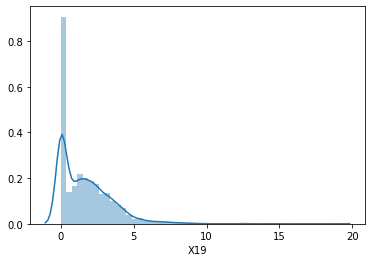

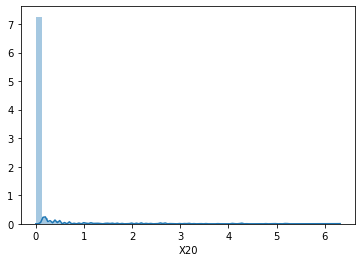

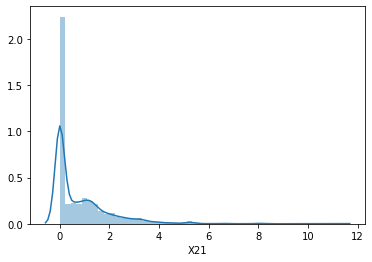

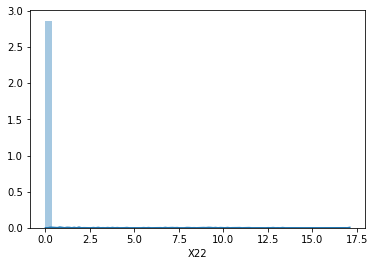

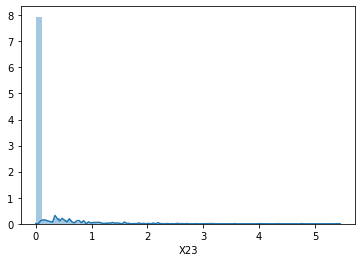

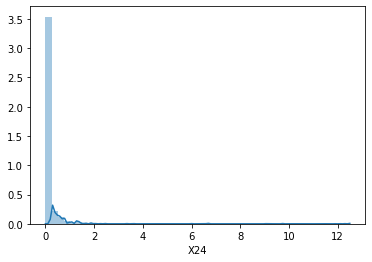

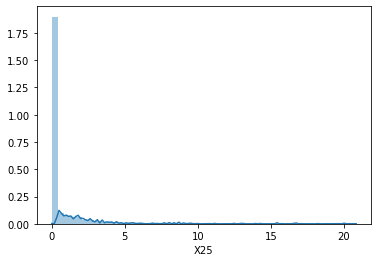

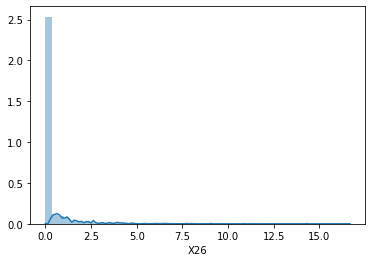

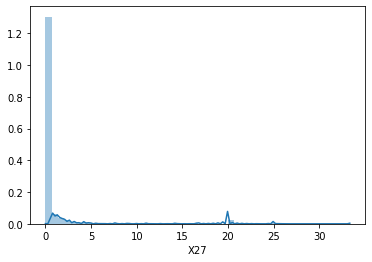

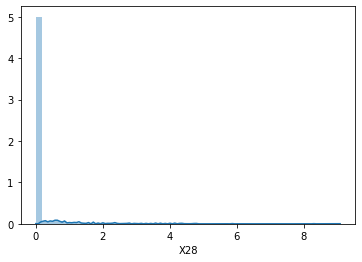

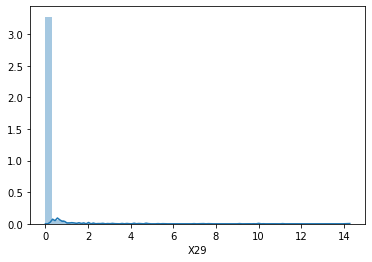

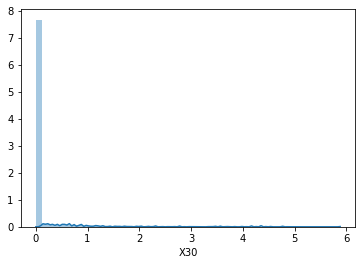

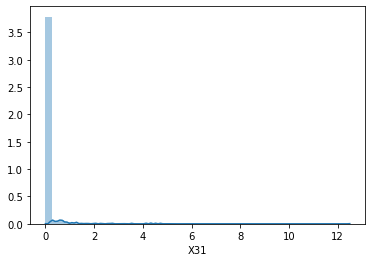

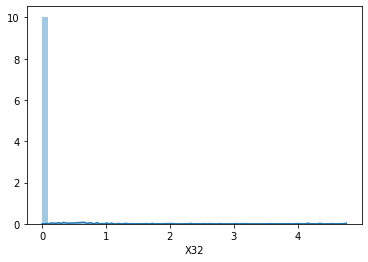

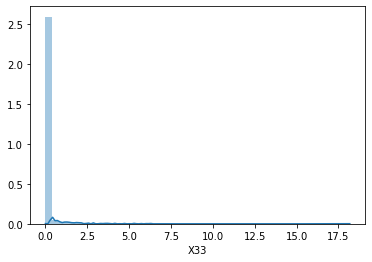

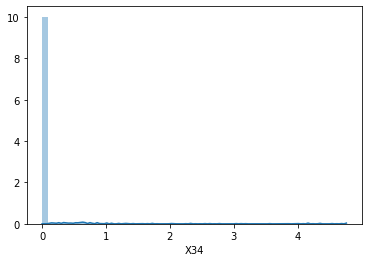

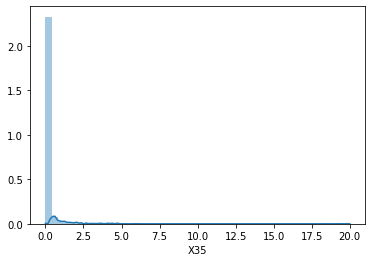

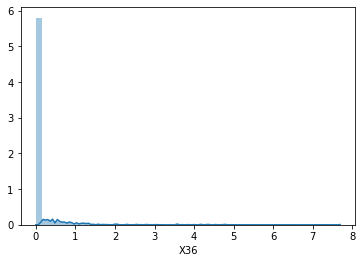

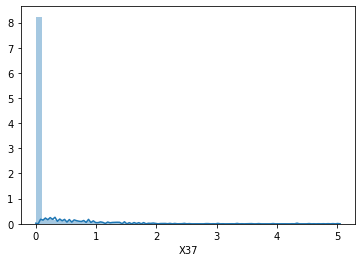

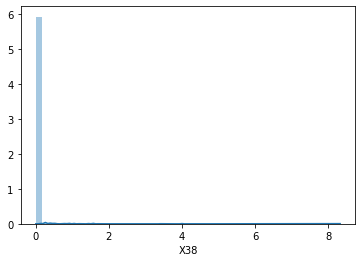

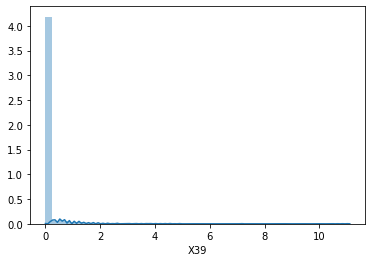

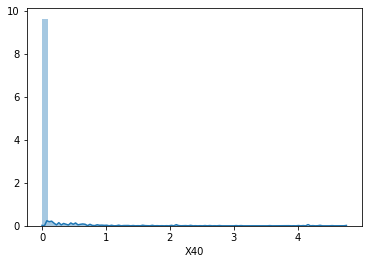

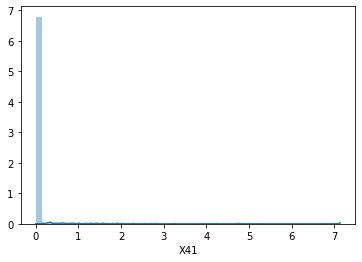

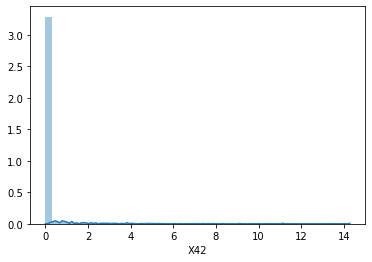

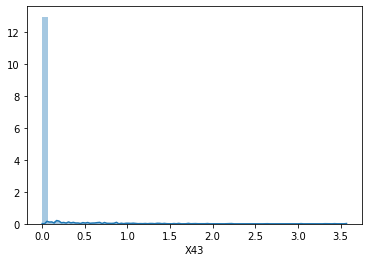

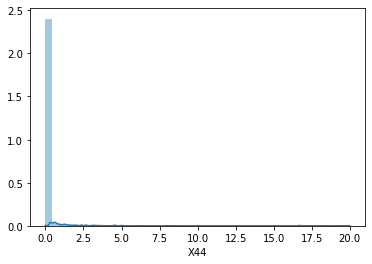

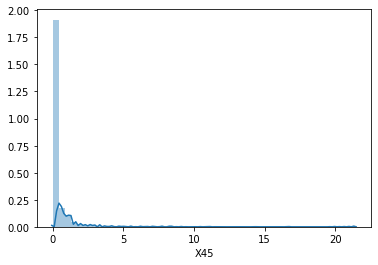

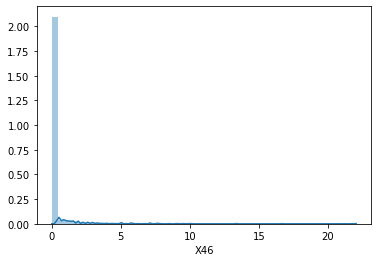

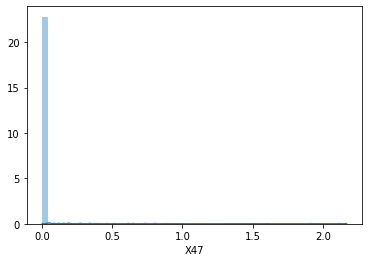

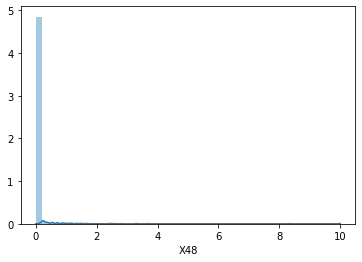

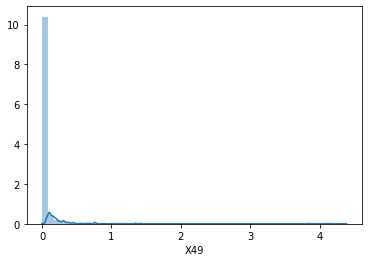

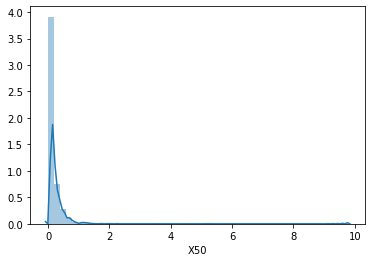

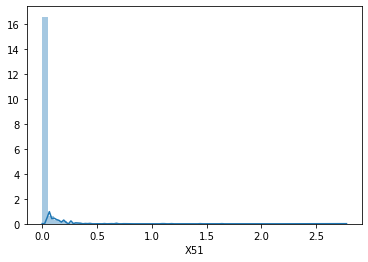

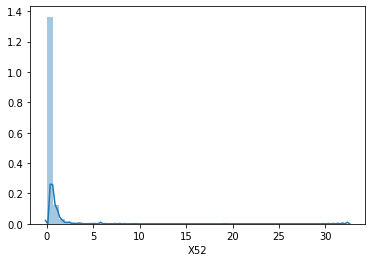

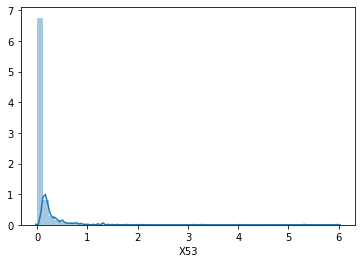

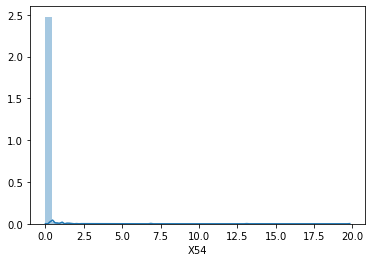

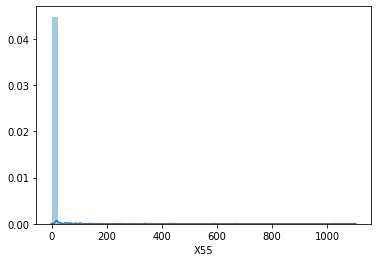

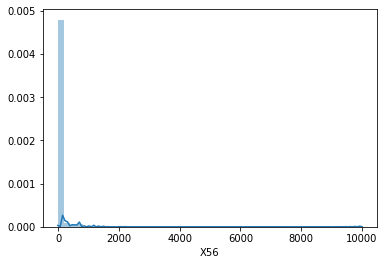

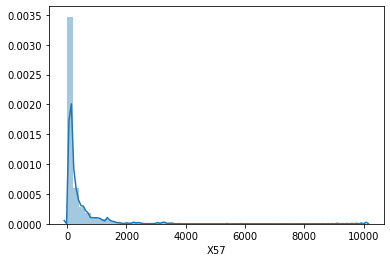

In [40]:
for i in train.drop('Y',axis=1).columns:    
    sns.distplot(train[i])
    plt.show()

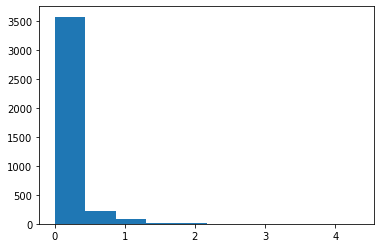

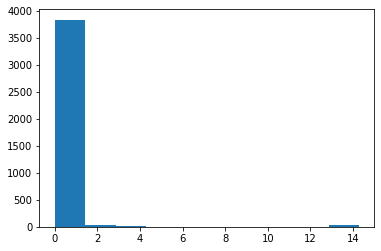

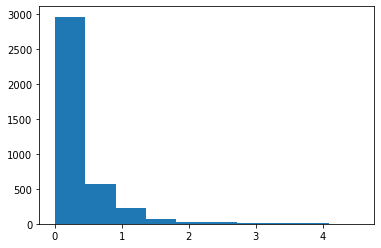

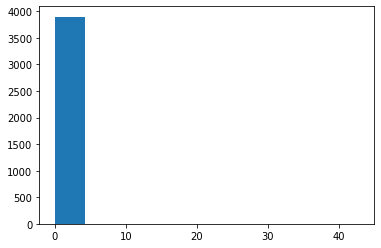

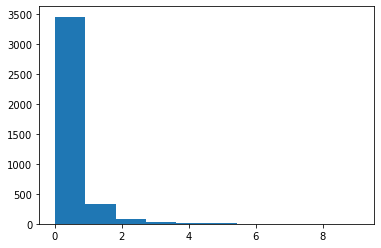

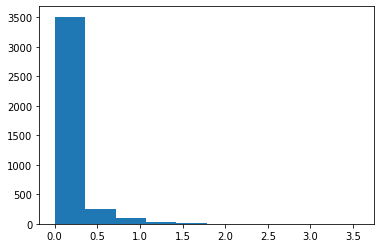

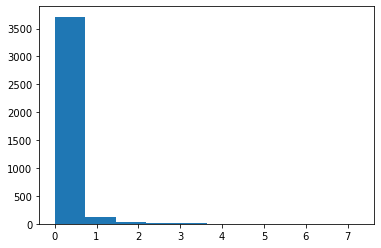

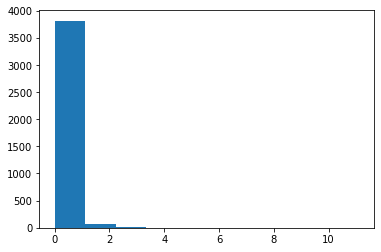

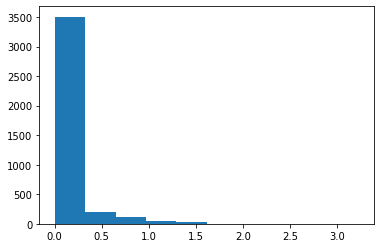

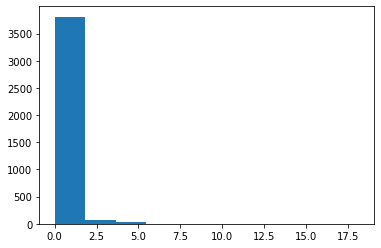

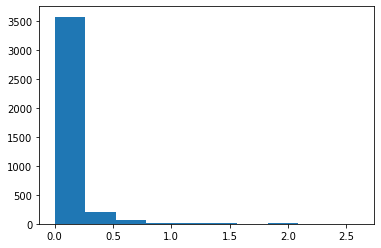

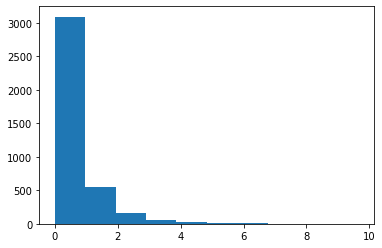

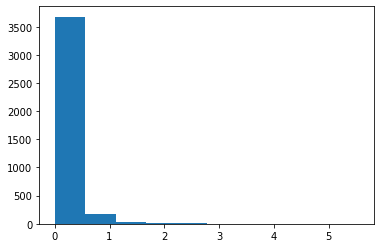

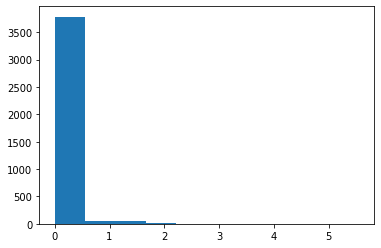

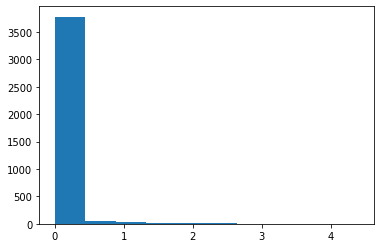

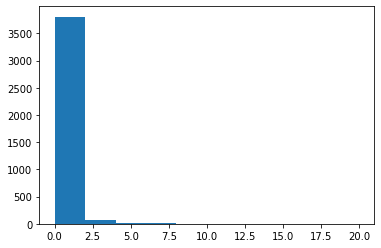

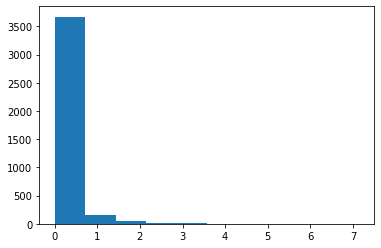

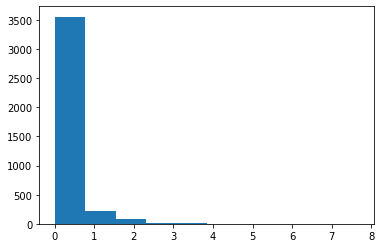

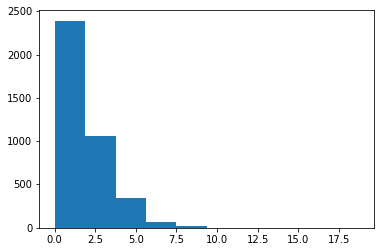

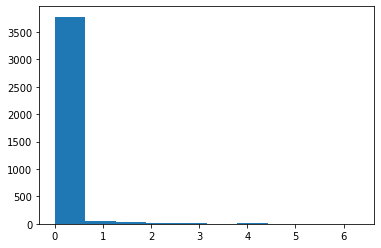

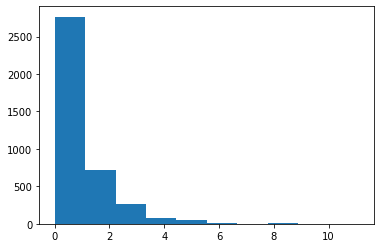

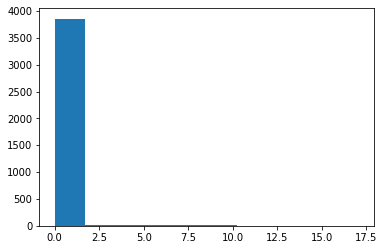

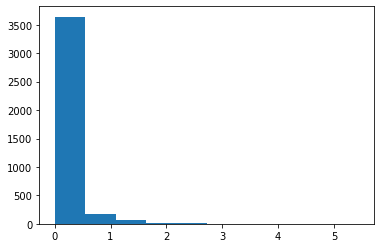

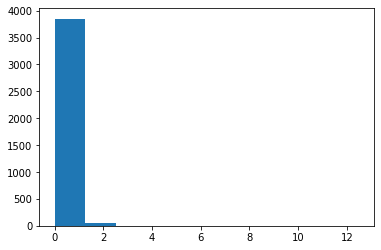

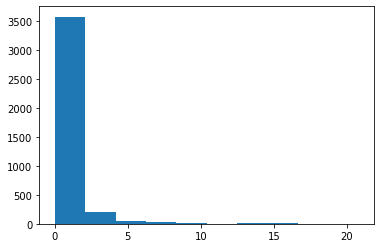

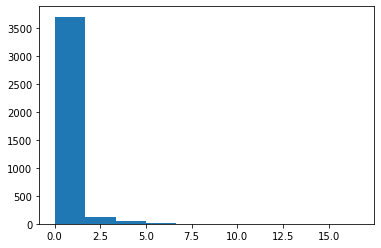

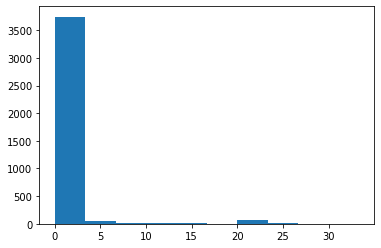

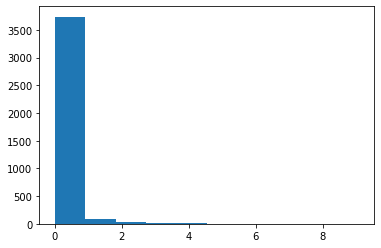

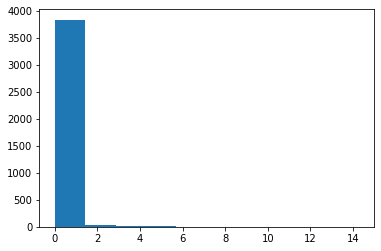

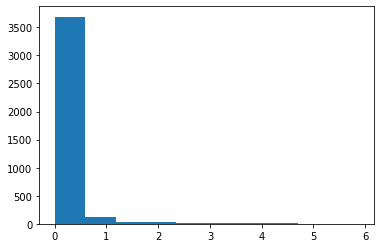

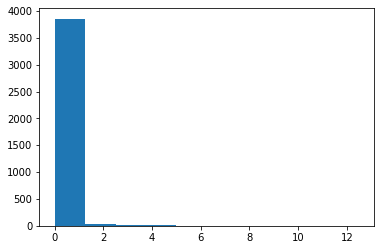

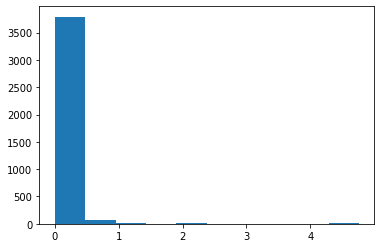

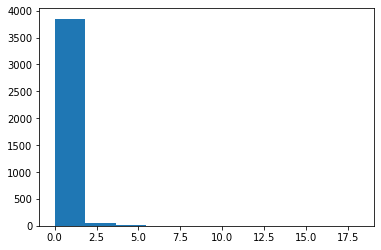

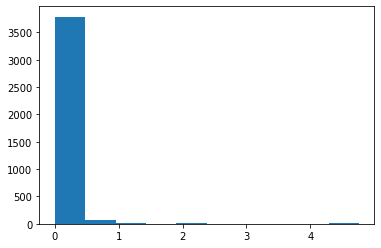

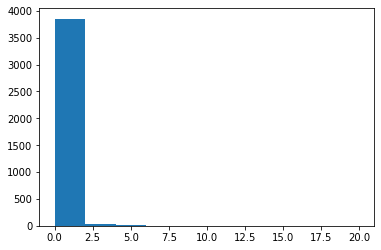

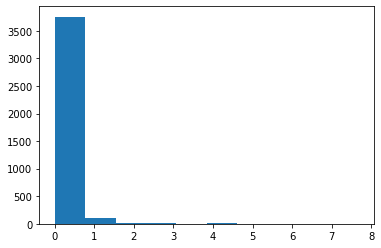

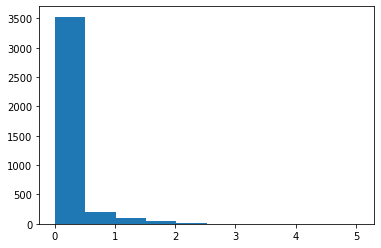

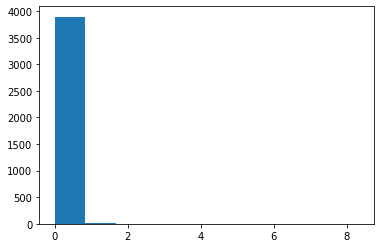

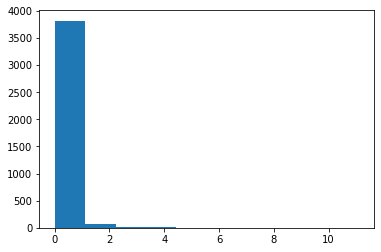

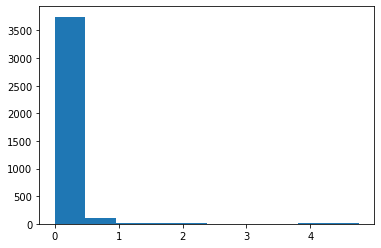

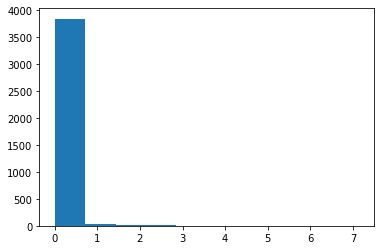

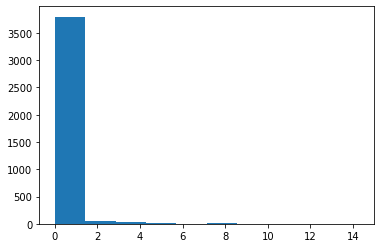

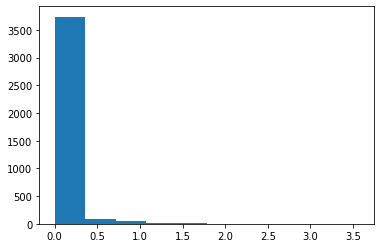

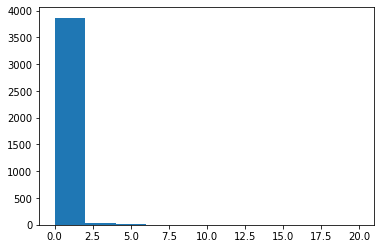

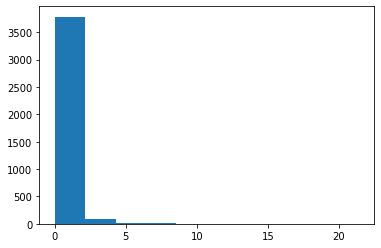

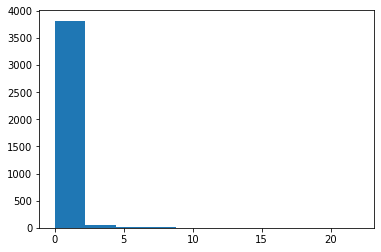

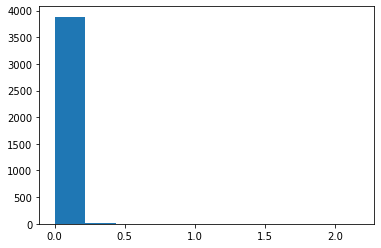

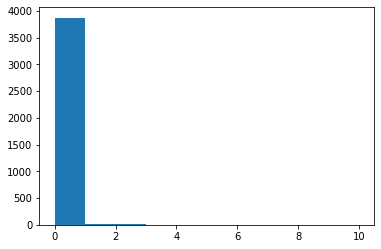

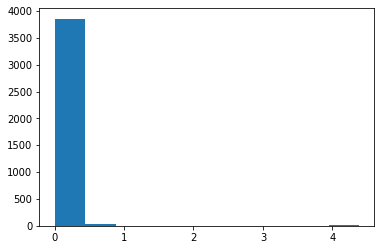

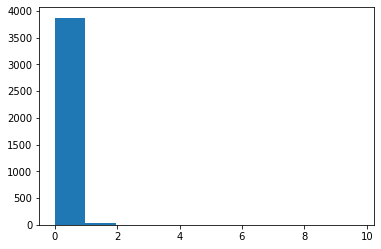

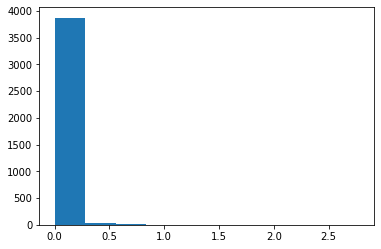

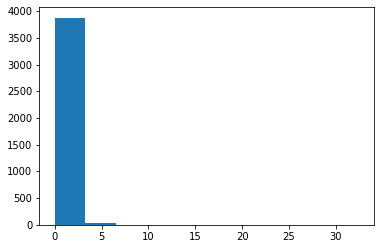

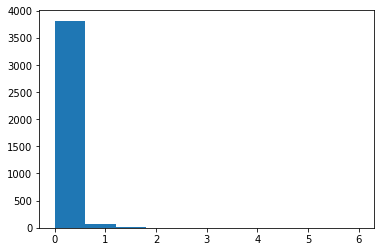

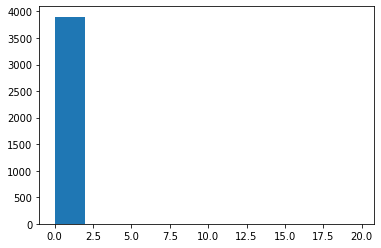

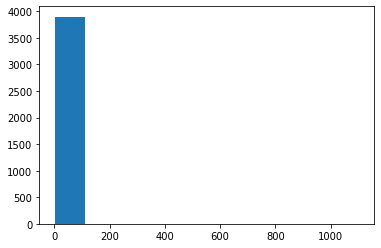

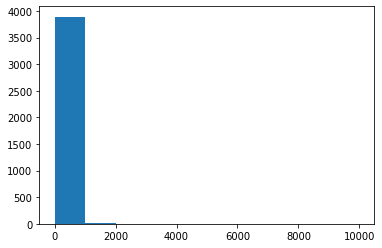

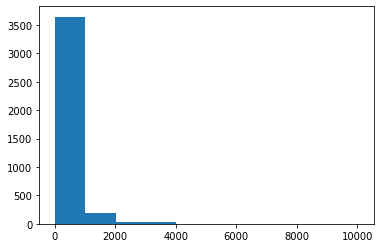

In [43]:
for i in train.drop('Y',axis=1).columns:    
    plt.hist(train[i])
    plt.show()

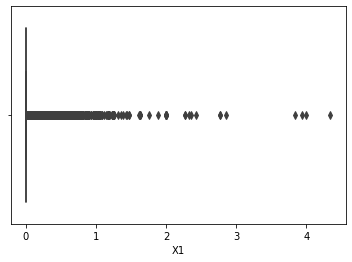

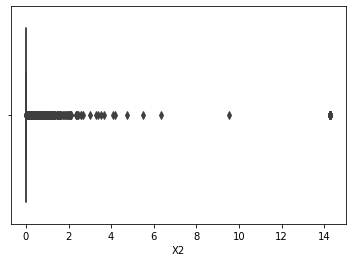

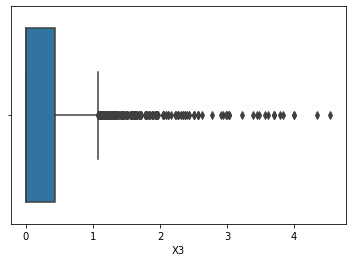

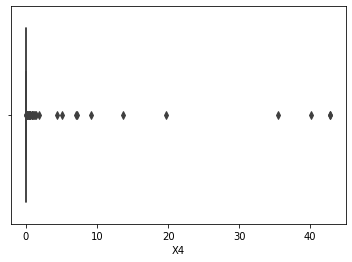

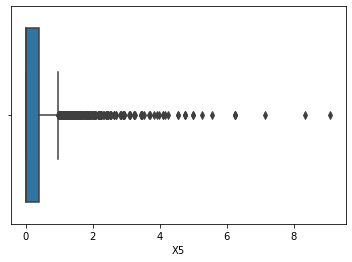

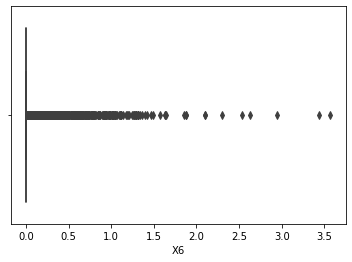

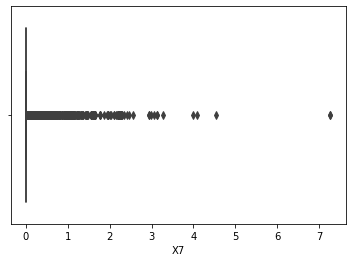

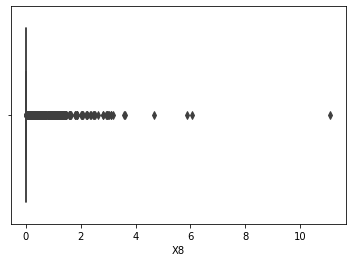

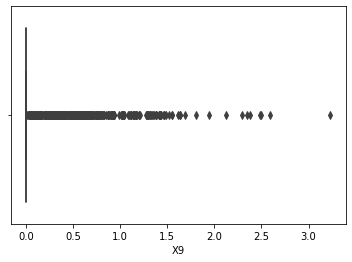

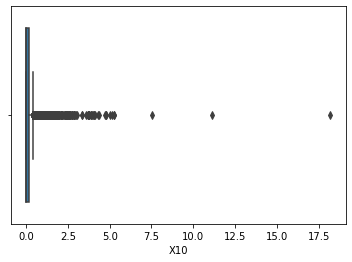

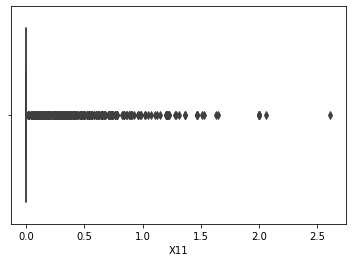

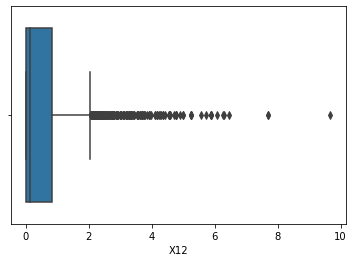

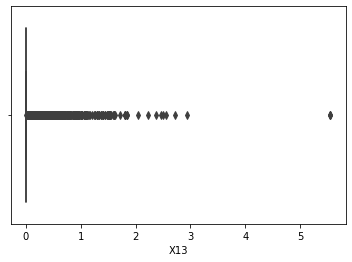

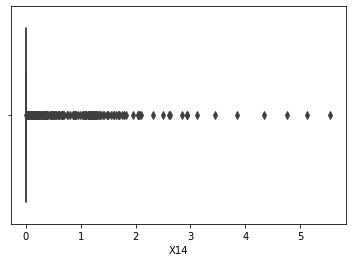

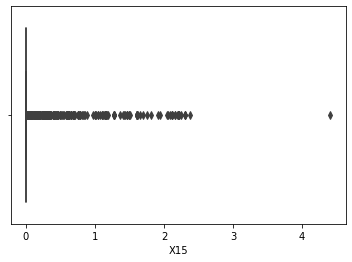

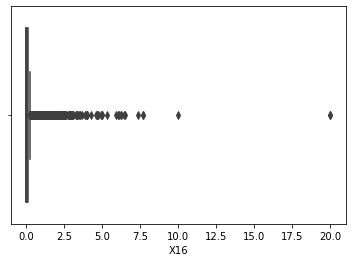

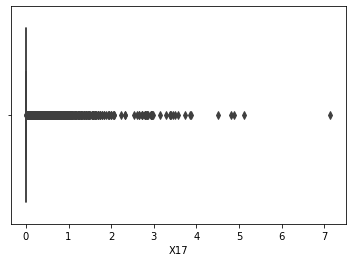

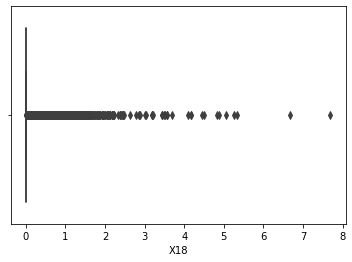

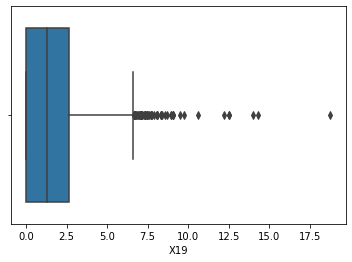

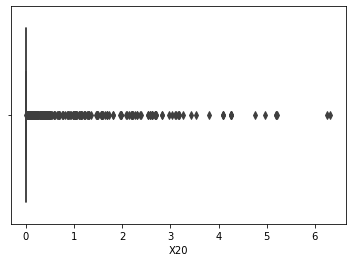

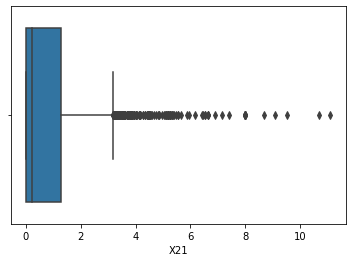

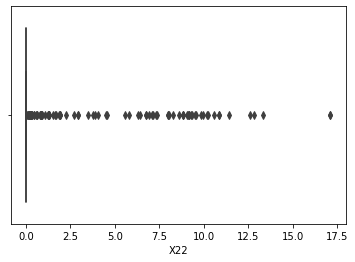

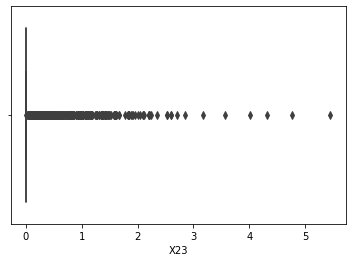

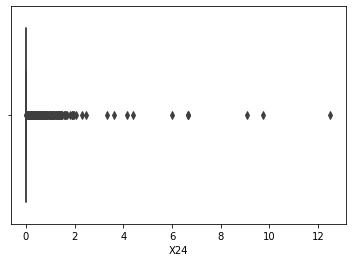

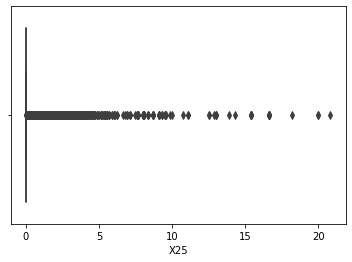

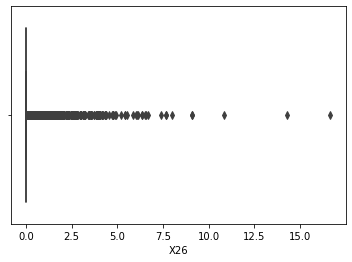

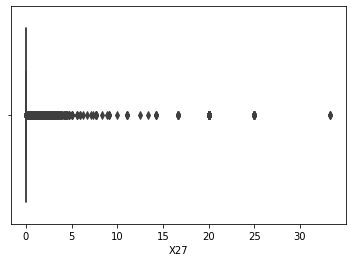

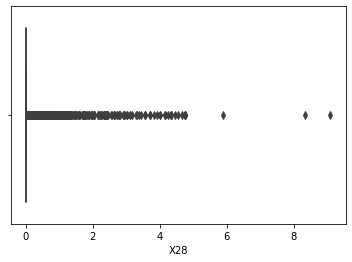

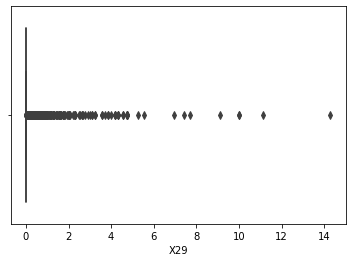

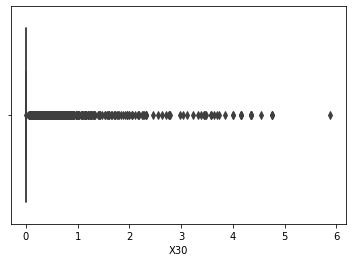

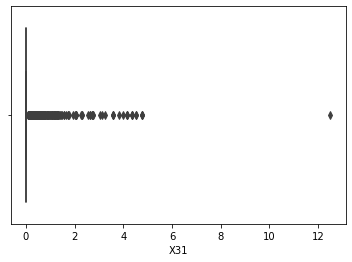

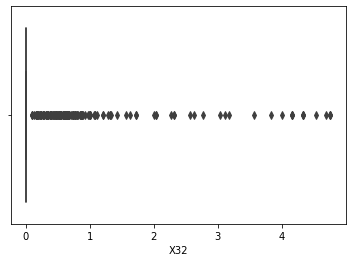

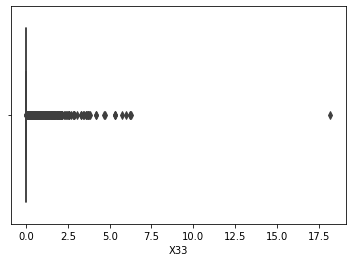

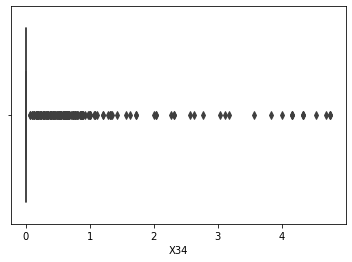

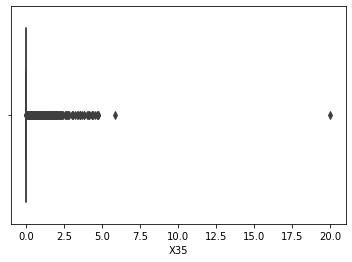

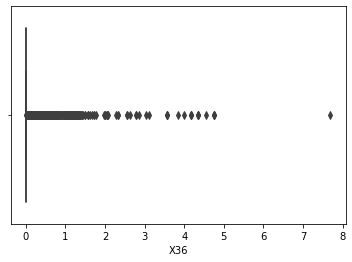

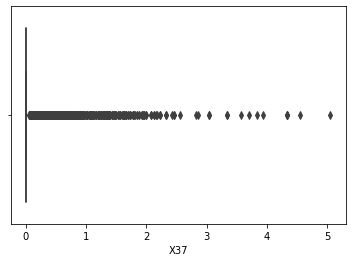

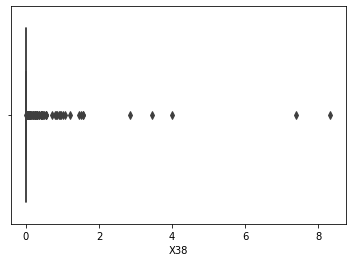

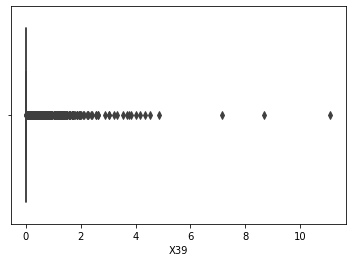

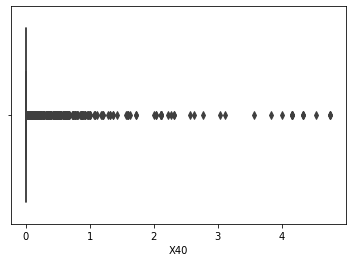

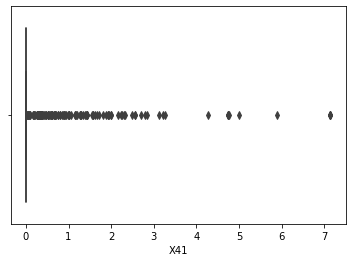

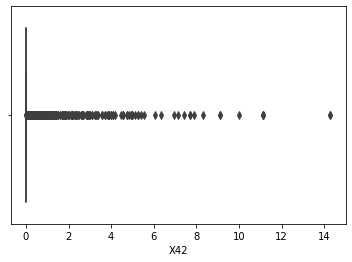

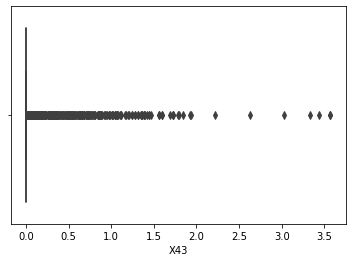

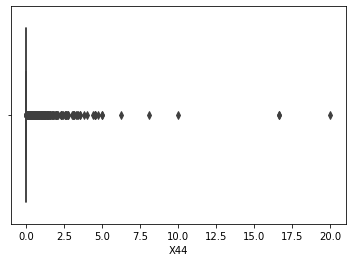

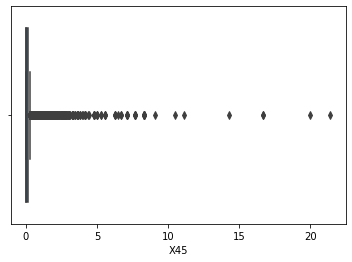

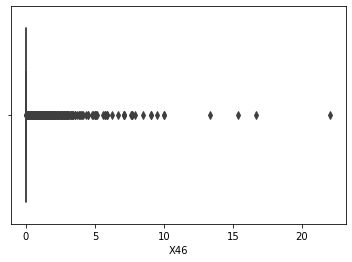

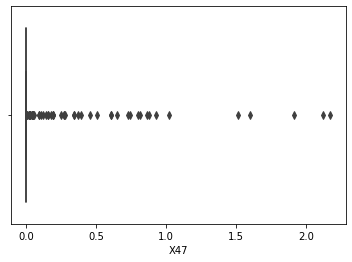

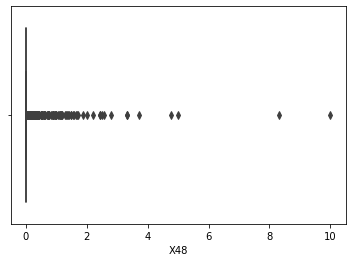

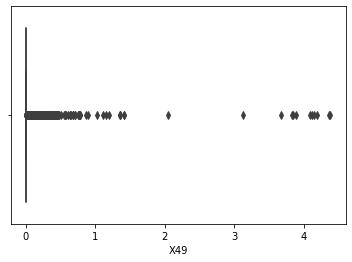

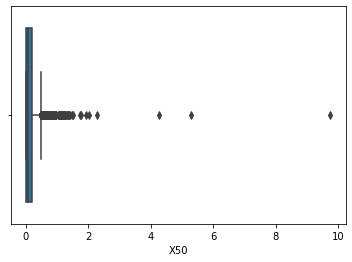

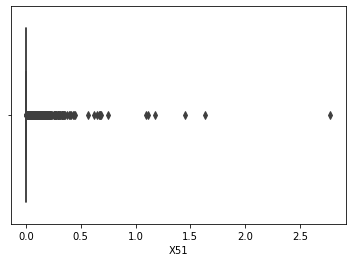

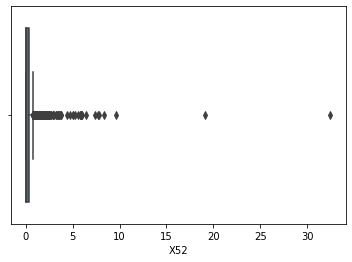

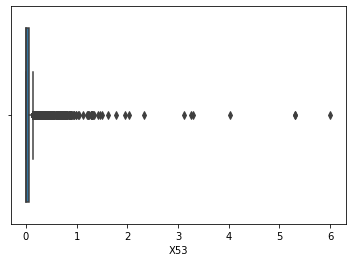

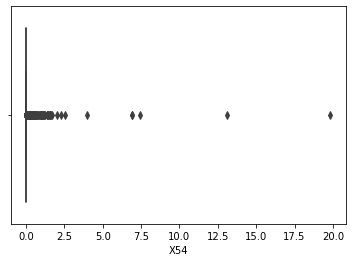

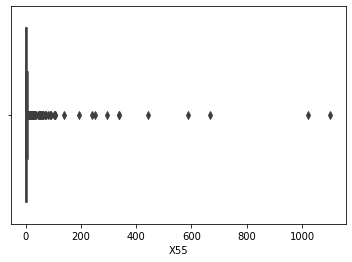

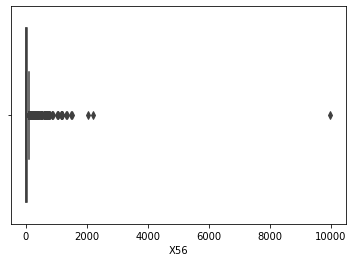

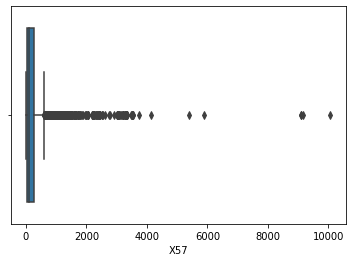

In [44]:
for i in train.drop('Y',axis=1).columns:    
    sns.boxplot(train[i])
    plt.show()

In [16]:
sns.pairplot(train.corr(),hue='Y')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000158DA185B88> (for post_execute):


KeyboardInterrupt: 

##### We can see there are many outliers are present in Dataset. 
#### As the Training Dataset is small and we dont have dataa imbalance so there is no need for data augmentation.
#### Instead of dropping the outliers we will treat them.

In [ ]:
#Checking for correlation
plt.figure(figsize=(20,10))
sns.heatmap(train.corr())

In [381]:
##As we have many features in the correlation plot we stack them to check correlation
corr = train.corr()
acc1 = corr.abs().unstack()
acc1.sort_values(ascending = False)
display(acc1[acc1 > 0.5])

Unnamed: 0  Unnamed: 0   1.00
X1          X1           1.00
X2          X2           1.00
X3          X3           1.00
X4          X4           1.00
X5          X5           1.00
X6          X6           1.00
X7          X7           1.00
X8          X8           1.00
X9          X9           1.00
X10         X10          1.00
X11         X11          1.00
X12         X12          1.00
X13         X13          1.00
X14         X14          1.00
X15         X15          1.00
X16         X16          1.00
X17         X17          1.00
X18         X18          1.00
X19         X19          1.00
X20         X20          1.00
X21         X21          1.00
X22         X22          1.00
X23         X23          1.00
X24         X24          1.00
X25         X25          1.00
X26         X26          1.00
X27         X27          1.00
X28         X28          1.00
            X30          0.53
            X32          0.54
            X34          0.54
            X35          0.56
          

In [124]:

#Printing correlation
print(round(train[["X28","Y",]].corr(),2),end="\n\n")
print(round(train[["X30","Y",]].corr(),2))


      X28     Y
X28  1.00 -0.16
Y   -0.16  1.00

      X30     Y
X30  1.00 -0.17
Y   -0.17  1.00


In [51]:
#train.drop(['X28'],axis=1,inplace=True)

In [127]:

#Printing correlation
print(round(train[["X31","Y",]].corr(),2),end="\n\n")
print(round(train[["X30","Y",]].corr(),2))


      X31     Y
X31  1.00 -0.13
Y   -0.13  1.00

      X30     Y
X30  1.00 -0.17
Y   -0.17  1.00


In [52]:
#train.drop(['X30'],axis=1,inplace=True)

In [132]:

#Printing correlation
print(round(train[["X31","Y",]].corr(),2),end="\n\n")
print(round(train[["X32","Y",]].corr(),2))


      X31     Y
X31  1.00 -0.13
Y   -0.13  1.00

      X32     Y
X32  1.00 -0.11
Y   -0.11  1.00


In [53]:
#train.drop(['X32'],axis=1,inplace=True)

In [135]:

#Printing correlation
print(round(train[["X31","Y",]].corr(),2),end="\n\n")
print(round(train[["X34","Y",]].corr(),2))


      X31     Y
X31  1.00 -0.13
Y   -0.13  1.00

      X34     Y
X34  1.00 -0.11
Y   -0.11  1.00


In [54]:
#train.drop(['X31'],axis=1,inplace=True)

In [138]:

#Printing correlation
print(round(train[["X35","Y",]].corr(),2),end="\n\n")
print(round(train[["X34","Y",]].corr(),2))


      X35     Y
X35  1.00 -0.15
Y   -0.15  1.00

      X34     Y
X34  1.00 -0.11
Y   -0.11  1.00


In [55]:
#train.drop(['X34'],axis=1,inplace=True)

In [141]:

#Printing correlation
print(round(train[["X36","Y",]].corr(),2),end="\n\n")
print(round(train[["X40","Y",]].corr(),2))


      X36     Y
X36  1.00 -0.14
Y   -0.14  1.00

      X40     Y
X40  1.00 -0.06
Y   -0.06  1.00


In [56]:
#train.drop(['X40'],axis=1,inplace=True)

In [144]:

#Printing correlation
print(round(train[["X56","Y",]].corr(),2),end="\n\n")
print(round(train[["X57","Y",]].corr(),2))


     X56    Y
X56 1.00 0.21
Y   0.21 1.00

     X57    Y
X57 1.00 0.27
Y   0.27 1.00


In [57]:
#train.drop(['X56'],axis=1,inplace=True)

In [386]:
train.shape

(3910, 58)

In [466]:


 #Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = train.columns
vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,X32,112.53
34,X34,109.49
58,Y,3.66
40,X40,3.66
36,X36,2.79
0,Unnamed: 0,2.71
56,X56,2.51
31,X31,2.44
19,X19,2.32
30,X30,2.30


In [17]:
train.drop(['X32'],axis=1,inplace=True)

In [18]:
train.drop(['X34'],axis=1,inplace=True)

In [19]:
# Putting feature variable to X
X = train.drop(['Y'],axis=1)

# Putting response variable to y
y = train['Y']

In [20]:

#Dividing the feaures in Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)
#models

In [21]:
# Let's run the model using the selected variables
log = LogisticRegression()
#logsk.fit(X_train[col], y_train)
log.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Predicted probabilities
y_pred = log.predict(X_test)
y_pred
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import confusion_matrix
cmat=print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

[[427  36]
 [ 34 285]]


0.9104859335038363

In [23]:
#Checking the accuracy on train model                                                                         
accuracy_score(y_train, log.predict(X_train))


0.9274296675191815

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       463
           1       0.89      0.89      0.89       319

    accuracy                           0.91       782
   macro avg       0.91      0.91      0.91       782
weighted avg       0.91      0.91      0.91       782



In [26]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = 10,200,50

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [1, 2, 4]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': (10, 200, 50),
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 2, 4, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [27]:
xgb=XGBClassifier(objective='binary:logistic')

In [28]:
rf = RandomForestClassifier(random_state=42)
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 2, verbose=3,n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.8min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [29]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [30]:
rf_final = RandomForestClassifier(bootstrap='False',
 max_depth= 1,
 max_features='auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 50)

In [31]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
#Checking the accuracy on train model                                                                         
accuracy_score(y_train, rf_final.predict(X_train))


0.8417519181585678

In [33]:
#Checking the accuracy on test model                                                                         
accuracy_score(y_test, rf_final.predict(X_test))


0.840153452685422

In [34]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1],
                "gamma":[i/10.0 for i in range(0,2)],#change in ginni index
                "max_depth": [2,3,4],
                "min_child_weight":[1,2,4,5,10],#no of samples falling in each node
                "max_delta_step":[0,1,2,5,10],#control the upcoming updates
                "n_estimators":[10,200,50]

             }


In [35]:
xgb=XGBClassifier(objective='binary:logistic')


In [36]:
n_iter=2

random_search=RandomizedSearchCV(xgb,cv=3,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [37]:
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=2, n_jo

In [38]:
xgb_best=random_search.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=10, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=10, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xgb_train_prediction=xgb_best.predict(X_test)
#Checking the accuracy on test model                                                                         
accuracy_score(y_test, xgb_best.predict(X_test))


0.9194373401534527

In [41]:
#Checking the accuracy on train model                                                                         
accuracy_score(y_train, xgb_best.predict(X_train))


0.9389386189258312

### Predicting on Test Data

In [51]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X33,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1


In [44]:
test.drop(['Unnamed: 0','X32','X34'],axis=1,inplace=True)

In [45]:
pred=xgb_best.predict(test)

In [46]:
pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [47]:
test['Y']=pred

In [49]:
test.shape

(691, 56)

In [53]:
test['Y'].value_counts()

0    433
1    258
Name: Y, dtype: int64

In [50]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X33,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1
